# Import Required Libraries
Import the necessary libraries, including Pandas and Matplotlib.

In [ ]:
!pip install pandas matplotlib seaborn scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Load the Dataset
Load the CSV file into a Pandas DataFrame.

D:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\CSV_lotto\lotto_prize_combined.csv

In [3]:
# Load the CSV file into a Pandas DataFrame
file_path = r'.\CSV_lotto\lotto_prize_combined.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
df.head(2)

,date,prize_1st,prize_2digits,prize_pre_3digit,prize_sub_3digits,prize_2nd,prize_3rd,prize_4th,prize_5th
0,30-12-2549,['778584'],['07'],"['164', '403']","['811', '971']","['004495', '034106', '049904', '067124', '0692...","['004495', '034106', '049904', '067124', '0692...","['004495', '034106', '049904', '067124', '0692...","['004495', '034106', '049904', '067124', '0692..."
1,16-01-2550,['838739'],['54'],"['263', '293']","['803', '845']","['011144', '015822', '018334', '018825', '0248...","['011144', '015822', '018334', '018825', '0248...","['011144', '015822', '018334', '018825', '0248...","['011144', '015822', '018334', '018825', '0248..."


# Data Cleaning and Preparation
Clean and prepare the data for analysis, including handling missing values and converting data types.

In [4]:
# Data Cleaning and Preparation

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with a placeholder or appropriate value
df.fillna('N/A', inplace=True)

# Convert 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)

# Convert prize columns from string representation of lists to actual lists
import ast

prize_columns = ['prize_1st', 'prize_2digits', 'prize_pre_3digit', 'prize_sub_3digits', 'prize_2nd', 'prize_3rd', 'prize_4th', 'prize_5th']
for col in prize_columns:
    df[col] = df[col].apply(ast.literal_eval)

# Display the cleaned DataFrame
df.head()

Missing values in each column:
 date                 0
prize_1st            0
prize_2digits        0
prize_pre_3digit     0
prize_sub_3digits    0
prize_2nd            0
prize_3rd            0
prize_4th            0
prize_5th            0
dtype: int64


,date,prize_1st,prize_2digits,prize_pre_3digit,prize_sub_3digits,prize_2nd,prize_3rd,prize_4th,prize_5th
0,30-12-2549,[778584],[07],"[164, 403]","[811, 971]","[004495, 034106, 049904, 067124, 069215, 07009...","[004495, 034106, 049904, 067124, 069215, 07009...","[004495, 034106, 049904, 067124, 069215, 07009...","[004495, 034106, 049904, 067124, 069215, 07009..."
1,16-01-2550,[838739],[54],"[263, 293]","[803, 845]","[011144, 015822, 018334, 018825, 024878, 04327...","[011144, 015822, 018334, 018825, 024878, 04327...","[011144, 015822, 018334, 018825, 024878, 04327...","[011144, 015822, 018334, 018825, 024878, 04327..."
2,01-02-2550,[769925],[56],"[239, 287]","[865, 893]","[000954, 006142, 006208, 012651, 038257, 05663...","[000954, 006142, 006208, 012651, 038257, 05663...","[000954, 006142, 006208, 012651, 038257, 05663...","[000954, 006142, 006208, 012651, 038257, 05663..."
3,16-02-2550,[277859],[95],"[384, 607]","[625, 979]","[010482, 013715, 018286, 047859, 053272, 05667...","[010482, 013715, 018286, 047859, 053272, 05667...","[010482, 013715, 018286, 047859, 053272, 05667...","[010482, 013715, 018286, 047859, 053272, 05667..."
4,01-03-2550,[742425],[61],"[294, 801]","[942, 949]","[001098, 016124, 025473, 039940, 040304, 04562...","[001098, 016124, 025473, 039940, 040304, 04562...","[001098, 016124, 025473, 039940, 040304, 04562...","[001098, 016124, 025473, 039940, 040304, 04562..."


# Visualize the Distribution of Numbers
Use Matplotlib to create visualizations of the distribution of numbers in the dataset.

In [8]:
!pip install numpy

# Find the Most Frequent Numbers
Analyze the dataset to find the most frequently occurring numbers.

# Find the Least Frequent Numbers
Analyze the dataset to find the least frequently occurring numbers.

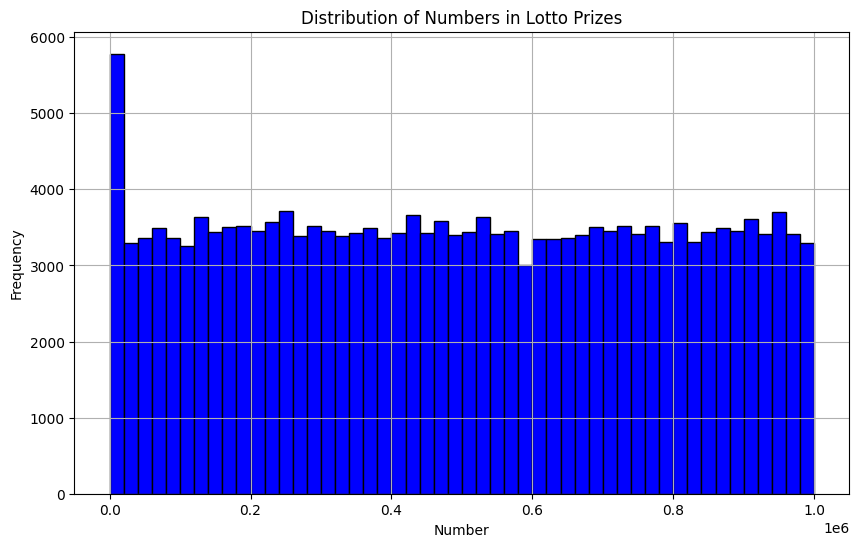

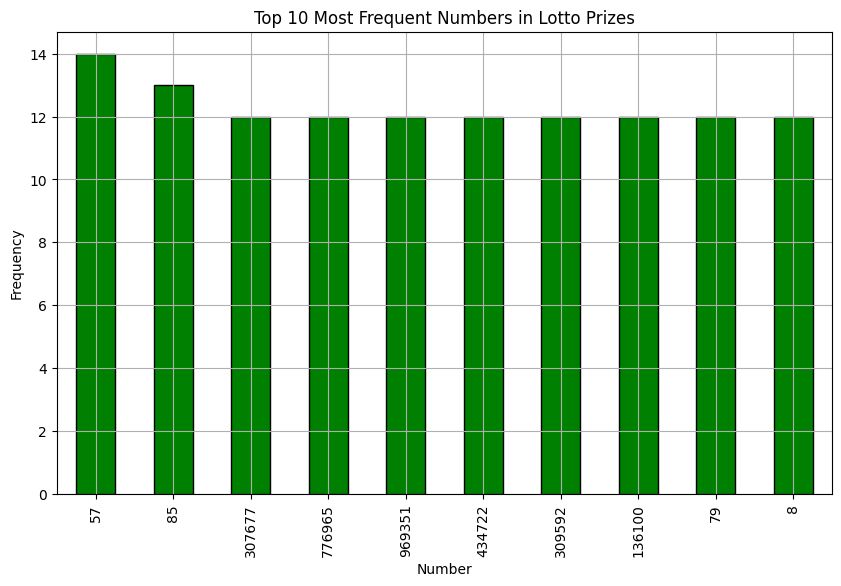

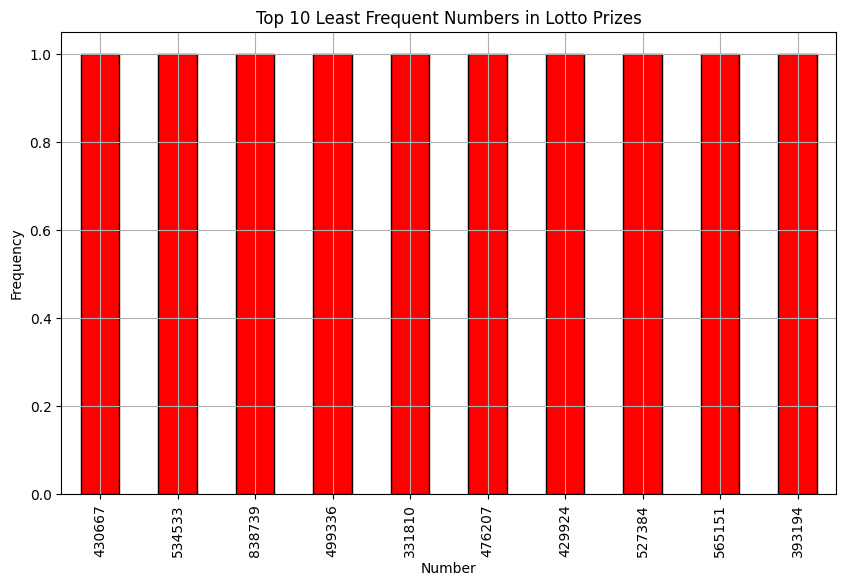

In [5]:
import numpy as np

# Extract all numbers from the prize columns and flatten the list
all_numbers = []
for col in prize_columns:
    all_numbers.extend(pd.to_numeric(df[col].explode().dropna(), errors='coerce').dropna().astype(int).tolist())

# Create a Pandas Series from the list of all numbers
numbers_series = pd.Series(all_numbers)

# Plot the distribution of numbers using a histogram
plt.figure(figsize=(10, 6))
plt.hist(numbers_series, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Numbers in Lotto Prizes')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the top 10 most frequent numbers
top_10_numbers = numbers_series.value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_numbers.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Most Frequent Numbers in Lotto Prizes')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the top 10 least frequent numbers
bottom_10_numbers = numbers_series.value_counts().tail(10)
plt.figure(figsize=(10, 6))
bottom_10_numbers.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Least Frequent Numbers in Lotto Prizes')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
df

,date,prize_1st,prize_2digits,prize_pre_3digit,prize_sub_3digits,prize_2nd,prize_3rd,prize_4th,prize_5th
0,30-12-2549,[778584],[07],"[164, 403]","[811, 971]","[004495, 034106, 049904, 067124, 069215, 07009...","[004495, 034106, 049904, 067124, 069215, 07009...","[004495, 034106, 049904, 067124, 069215, 07009...","[004495, 034106, 049904, 067124, 069215, 07009..."
1,16-01-2550,[838739],[54],"[263, 293]","[803, 845]","[011144, 015822, 018334, 018825, 024878, 04327...","[011144, 015822, 018334, 018825, 024878, 04327...","[011144, 015822, 018334, 018825, 024878, 04327...","[011144, 015822, 018334, 018825, 024878, 04327..."
2,01-02-2550,[769925],[56],"[239, 287]","[865, 893]","[000954, 006142, 006208, 012651, 038257, 05663...","[000954, 006142, 006208, 012651, 038257, 05663...","[000954, 006142, 006208, 012651, 038257, 05663...","[000954, 006142, 006208, 012651, 038257, 05663..."
3,16-02-2550,[277859],[95],"[384, 607]","[625, 979]","[010482, 013715, 018286, 047859, 053272, 05667...","[010482, 013715, 018286, 047859, 053272, 05667...","[010482, 013715, 018286, 047859, 053272, 05667...","[010482, 013715, 018286, 047859, 053272, 05667..."
4,01-03-2550,[742425],[61],"[294, 801]","[942, 949]","[001098, 016124, 025473, 039940, 040304, 04562...","[001098, 016124, 025473, 039940, 040304, 04562...","[001098, 016124, 025473, 039940, 040304, 04562...","[001098, 016124, 025473, 039940, 040304, 04562..."
...,...,...,...,...,...,...,...,...,...
426,16-12-2567,[097863],[21],"[290, 742]","[339, 881]","[000720, 126272, 188327, 277818, 381363, 51817...","[000720, 126272, 188327, 277818, 381363, 51817...","[000720, 126272, 188327, 277818, 381363, 51817...","[000720, 126272, 188327, 277818, 381363, 51817..."
427,02-01-2568,[730209],[51],"[446, 065]","[376, 297]","[107563, 826029, 943848, 833998, 765600, 18454...","[107563, 826029, 943848, 833998, 765600, 18454...","[107563, 826029, 943848, 833998, 765600, 18454...","[107563, 826029, 943848, 833998, 765600, 18454..."
428,17-01-2568,[807779],[23],"[699, 961]","[448, 477]","[043279, 123993, 210295, 316422, 438472, 50217...","[043279, 123993, 210295, 316422, 438472, 50217...","[043279, 123993, 210295, 316422, 438472, 50217...","[043279, 123993, 210295, 316422, 438472, 50217..."
429,01-02-2568,[558700],[51],"[285, 418]","[685, 824]","[002886, 127745, 237637, 357324, 423932, 50065...","[002886, 127745, 237637, 357324, 423932, 50065...","[002886, 127745, 237637, 357324, 423932, 50065...","[002886, 127745, 237637, 357324, 423932, 50065..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               431 non-null    object
 1   prize_1st          431 non-null    object
 2   prize_2digits      431 non-null    object
 3   prize_pre_3digit   431 non-null    object
 4   prize_sub_3digits  431 non-null    object
 5   prize_2nd          431 non-null    object
 6   prize_3rd          431 non-null    object
 7   prize_4th          431 non-null    object
 8   prize_5th          431 non-null    object
dtypes: object(9)
memory usage: 30.4+ KB


In [10]:
df.describe

<bound method NDFrame.describe of            date prize_1st prize_2digits prize_pre_3digit prize_sub_3digits  \
0    30-12-2549  [778584]          [07]       [164, 403]        [811, 971]   
1    16-01-2550  [838739]          [54]       [263, 293]        [803, 845]   
2    01-02-2550  [769925]          [56]       [239, 287]        [865, 893]   
3    16-02-2550  [277859]          [95]       [384, 607]        [625, 979]   
4    01-03-2550  [742425]          [61]       [294, 801]        [942, 949]   
..          ...       ...           ...              ...               ...   
426  16-12-2567  [097863]          [21]       [290, 742]        [339, 881]   
427  02-01-2568  [730209]          [51]       [446, 065]        [376, 297]   
428  17-01-2568  [807779]          [23]       [699, 961]        [448, 477]   
429  01-02-2568  [558700]          [51]       [285, 418]        [685, 824]   
430  16-02-2568  [847377]          [50]       [268, 613]        [652, 001]   

                             

In [11]:
df.prize_1st.value_counts()


prize_1st
[847377]    1
[778584]    1
[838739]    1
[769925]    1
[277859]    1
           ..
[032988]    1
[430667]    1
[499336]    1
[331810]    1
[476207]    1
Name: count, Length: 431, dtype: int64

In [13]:
df.prize_2digits.value_counts()

prize_2digits
[79]    11
[85]     9
[05]     8
[92]     8
[14]     8
        ..
[16]     2
[72]     1
[74]     1
[84]     1
[04]     1
Name: count, Length: 99, dtype: int64

# 2 ตัว

In [14]:
# Convert lists to strings, remove square brackets, single quotes, and split the string into individual numbers
df['prize_2digits'] = df['prize_2digits'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)
df['prize_2digits'] = df['prize_2digits'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(',')

# Explode the list into separate rows and count the occurrences of each number
prize_2digits_counts = df['prize_2digits'].explode().value_counts()

print(prize_2digits_counts)

prize_2digits
79    11
85     9
05     8
92     8
14     8
      ..
16     2
72     1
74     1
84     1
04     1
Name: count, Length: 99, dtype: int64


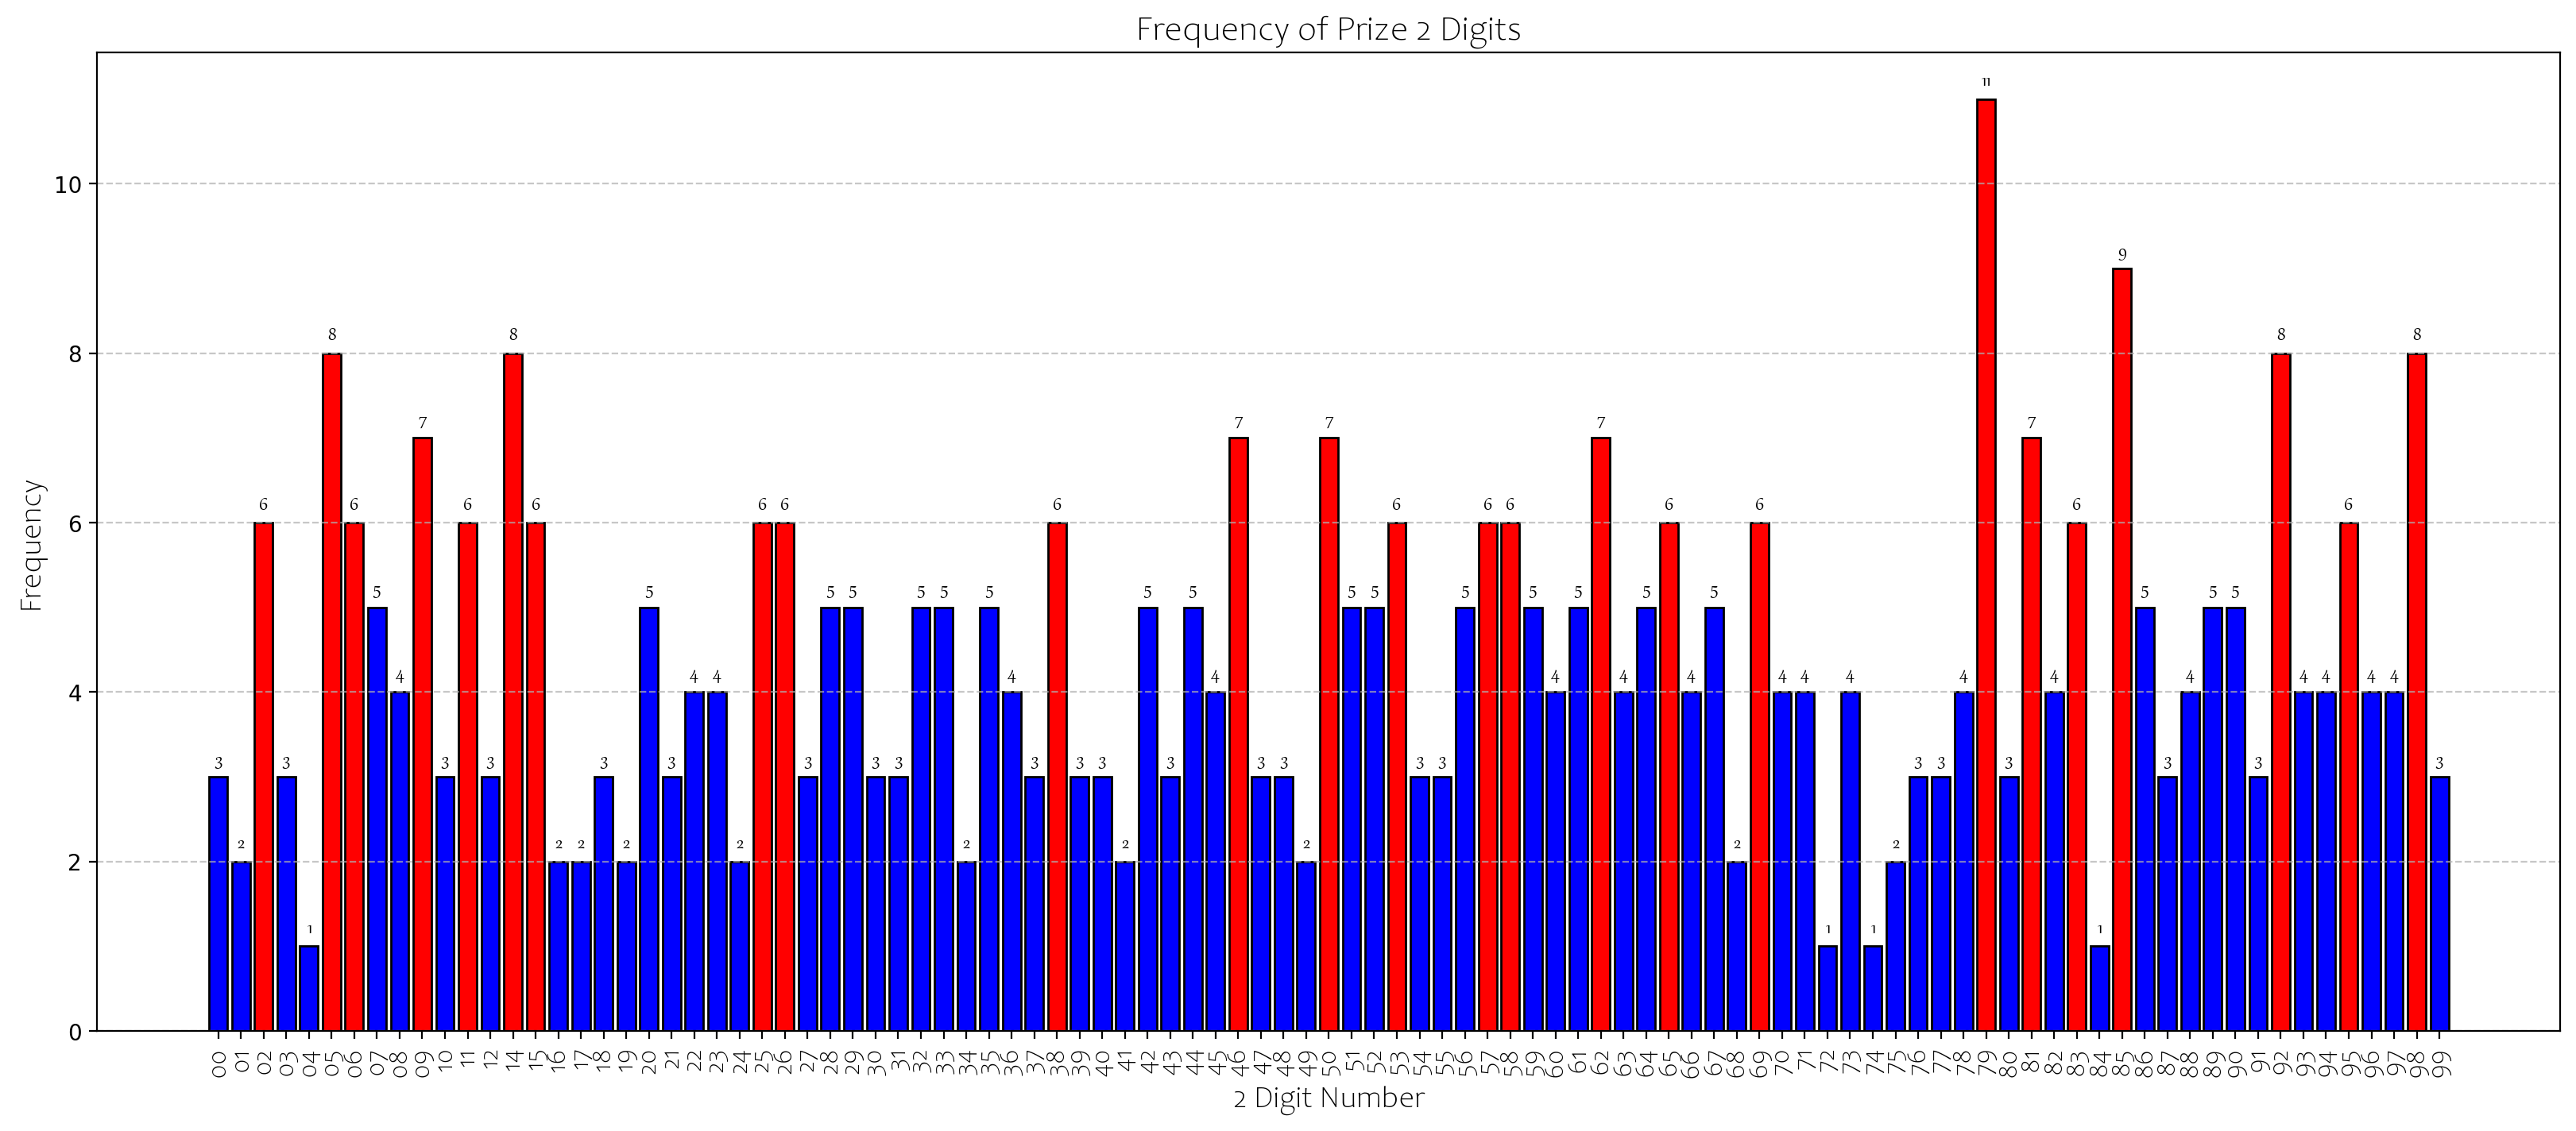

In [16]:
# Sort the prize_2digits_counts by frequency and then by index
prize_2digits_counts_sorted = prize_2digits_counts.sort_values(ascending=False).sort_index(key=lambda x: x.astype(int))

# Set the figure DPI for retina resolution
plt.rcParams['figure.dpi'] = 200

# Plot the frequency of prize_2digits_counts as a histogram
plt.figure(figsize=(20, 8))
colors = ['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values]
bars = plt.bar(prize_2digits_counts_sorted.index, prize_2digits_counts_sorted.values, color=colors, edgecolor='black')

# Add text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=10, fontname='Gabriola')

fontname = 'Candara'
plt.title('Frequency of Prize 2 Digits', fontsize=16, fontname=fontname)
plt.xlabel('2 Digit Number', fontsize=14, fontname=fontname)
plt.ylabel('Frequency', fontsize=14, fontname=fontname)
plt.xticks(rotation=90, fontsize=12, fontname=fontname)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(r'.\img\frequency_prize_3_digits.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
!pip install seaborn

C:\Users\const\AppData\Local\Temp\ipykernel_21496\3756515330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=colors)


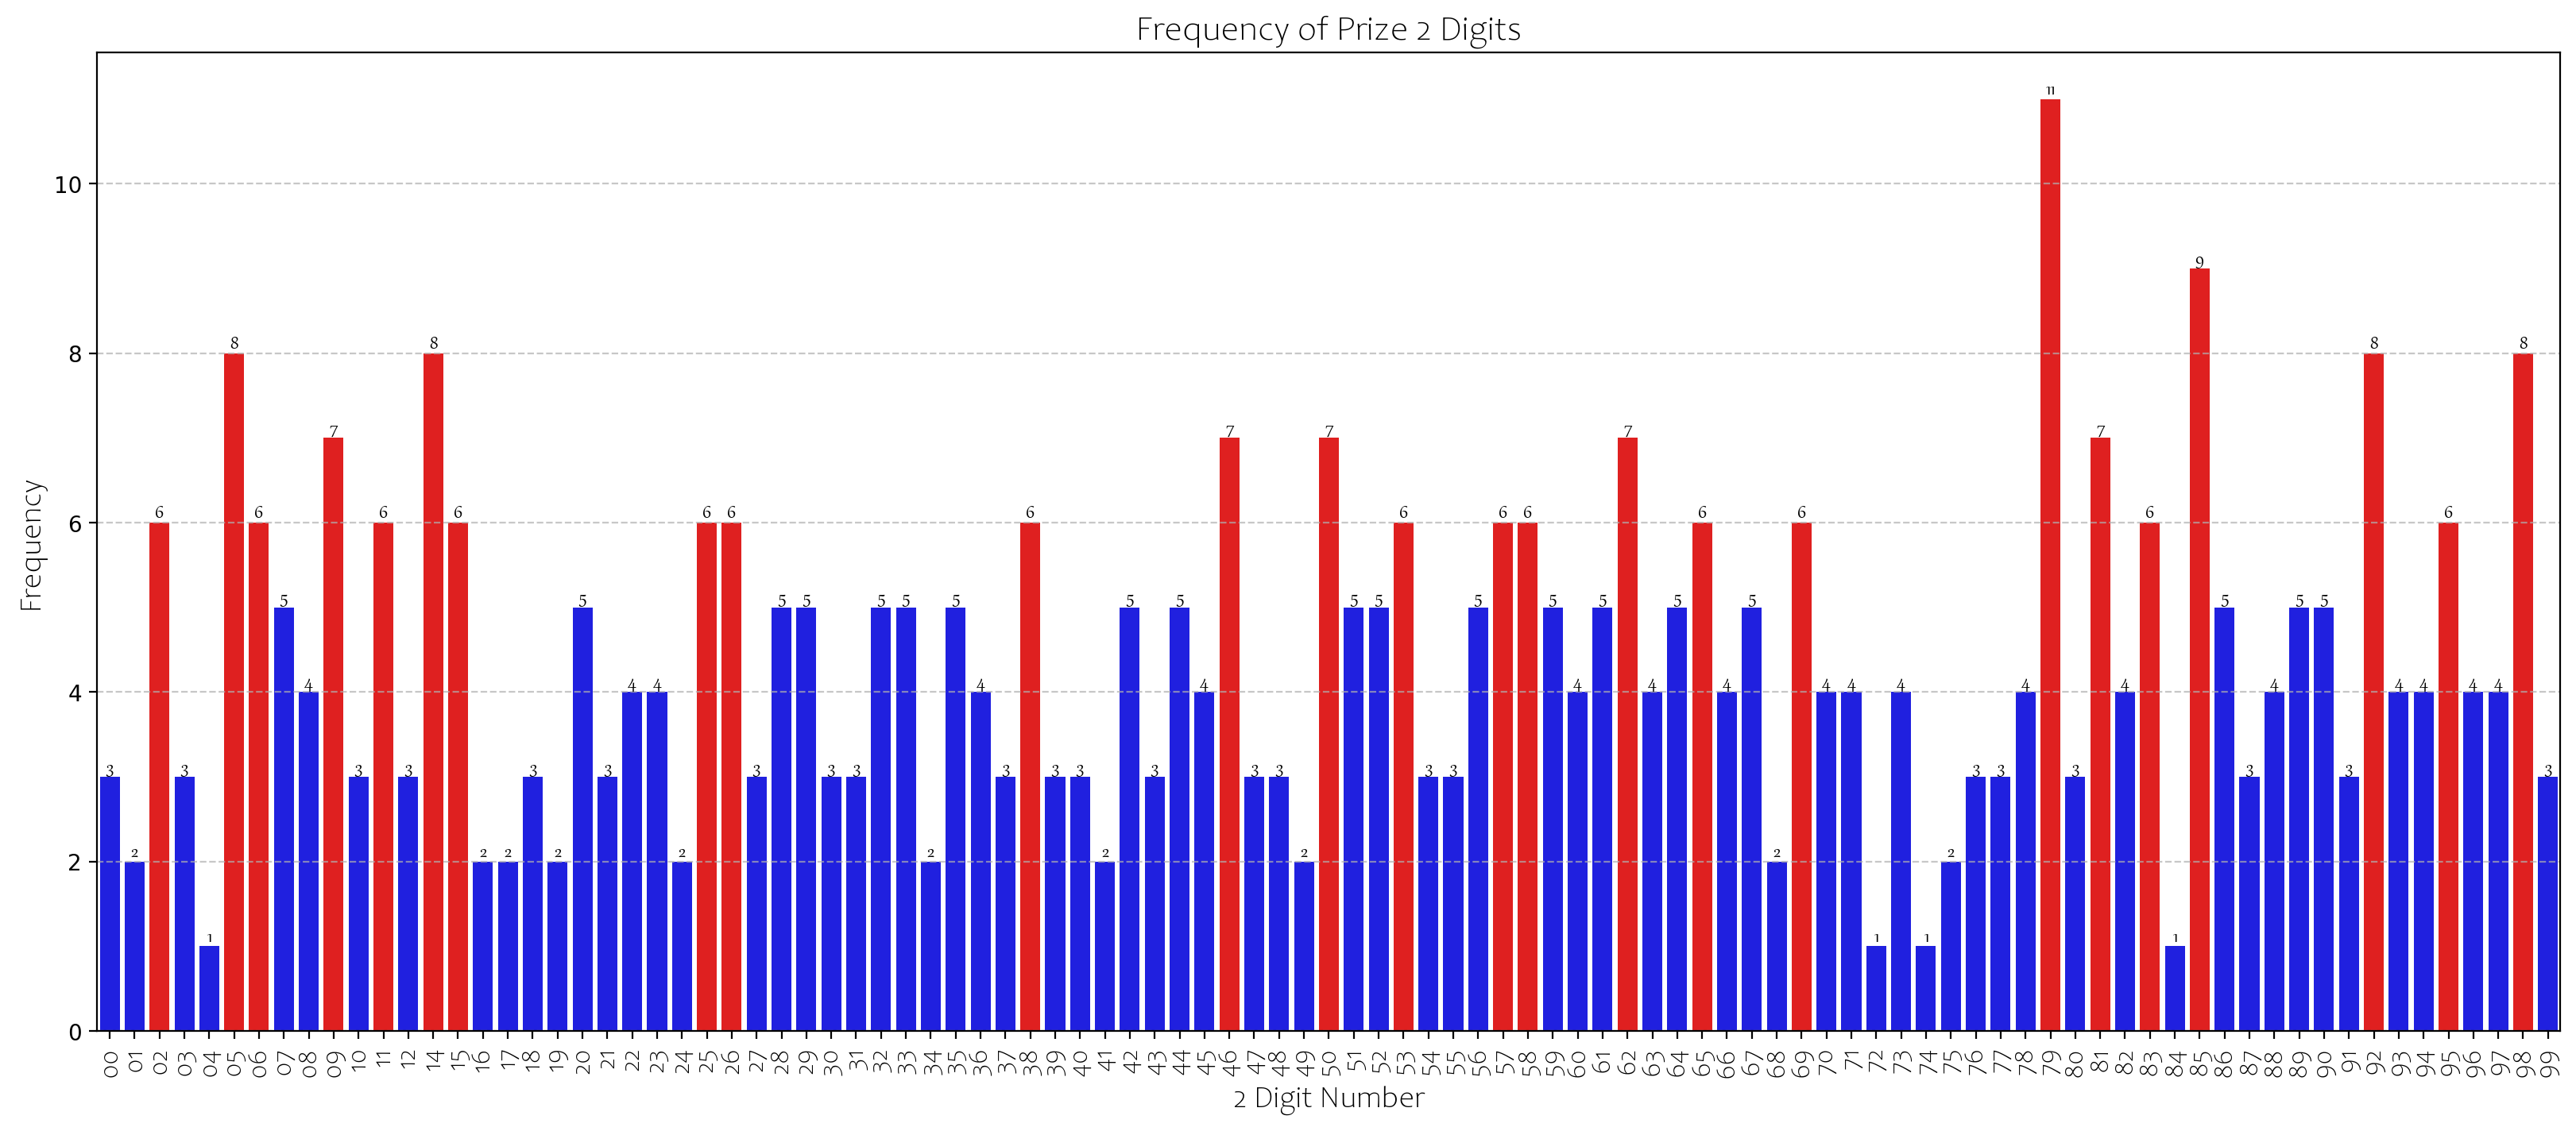

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the frequency of prize_2digits_counts_sorted as a bar plot using Seaborn
plt.figure(figsize=(20, 8))
colors = ['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values]
bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=colors)

# Add text labels on the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', 
                  (bar.get_x() + bar.get_width() / 2, yval), 
                  ha='center', va='bottom', 
                  fontsize=10, fontname='Gabriola')

fontname = 'Candara'
plt.title('Frequency of Prize 2 Digits', fontsize=16, fontname=fontname)
plt.xlabel('2 Digit Number', fontsize=14, fontname=fontname)
plt.ylabel('Frequency', fontsize=14, fontname=fontname)
plt.xticks(rotation=90, fontsize=12, fontname=fontname)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(r'.\img\frequency_prize_2_digitss.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\const\AppData\Local\Temp\ipykernel_21496\537768993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values])


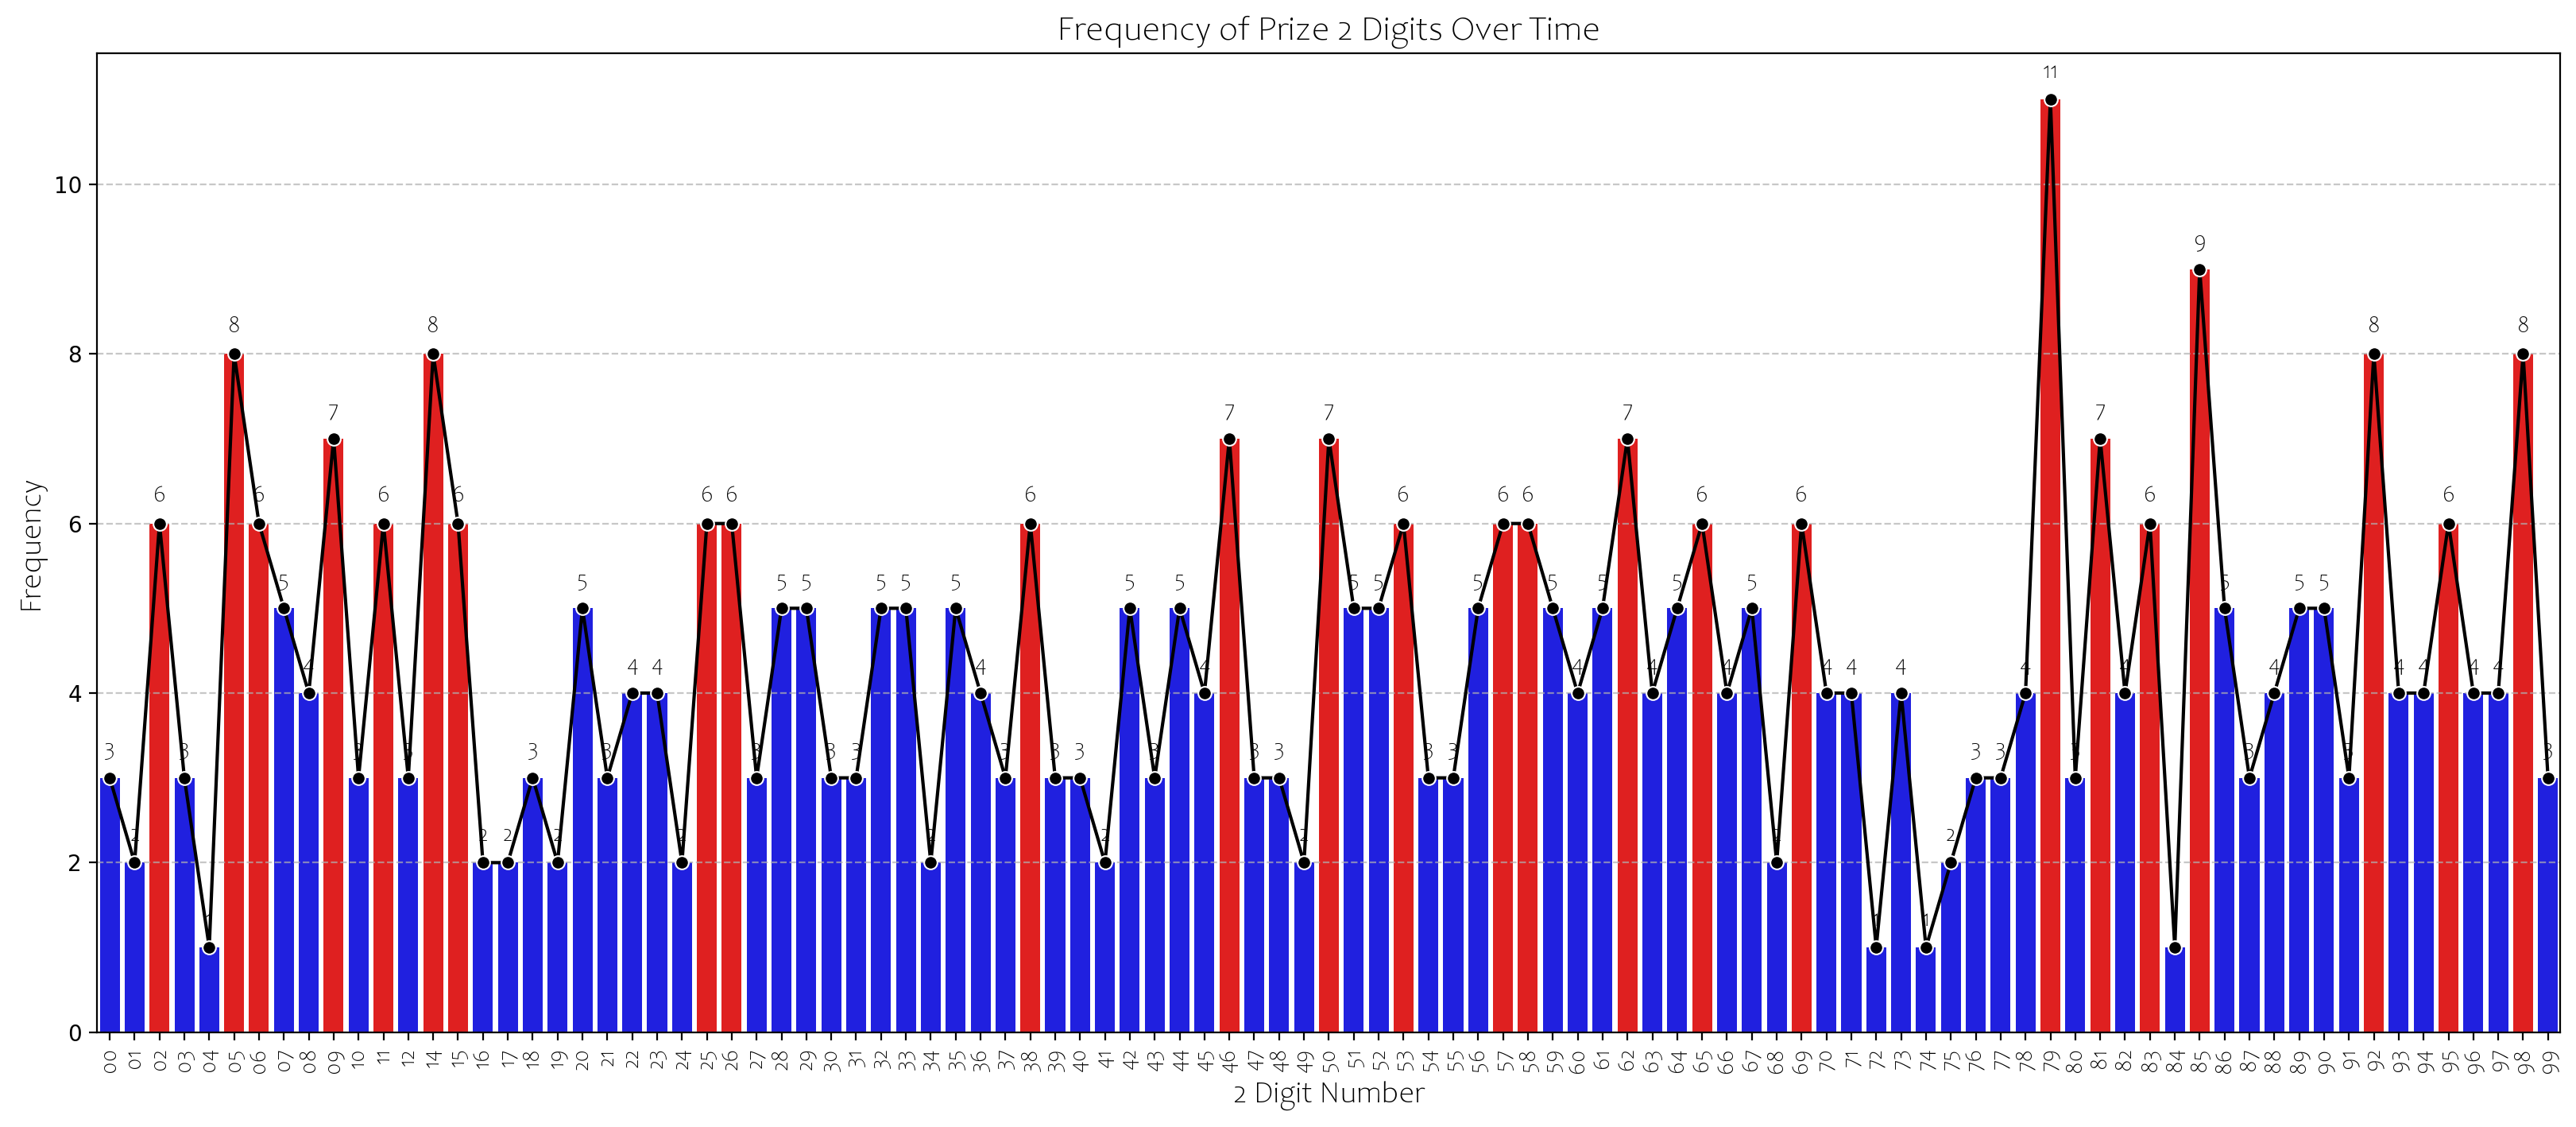

In [18]:
# Generate a Seaborn line plot for the frequency of prize_2digits_counts_sorted
plt.figure(figsize=(20, 8))
sns.lineplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, marker='o', color='black')
bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values])

# Add text labels on the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', 
                  (bar.get_x() + bar.get_width() / 2, yval+.2), 
                  ha='center', va='bottom', 
                  fontsize=10, fontname='Candara')

fontname = 'Candara'
plt.title('Frequency of Prize 2 Digits Over Time', fontsize=16, fontname=fontname)
plt.xlabel('2 Digit Number', fontsize=14, fontname=fontname)
plt.ylabel('Frequency', fontsize=14, fontname=fontname)
plt.xticks(rotation=90, fontsize=10, fontname=fontname)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.savefig(r'.\img\frequency_prize_4_digits_lineplot.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
!pip install sklearn

d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


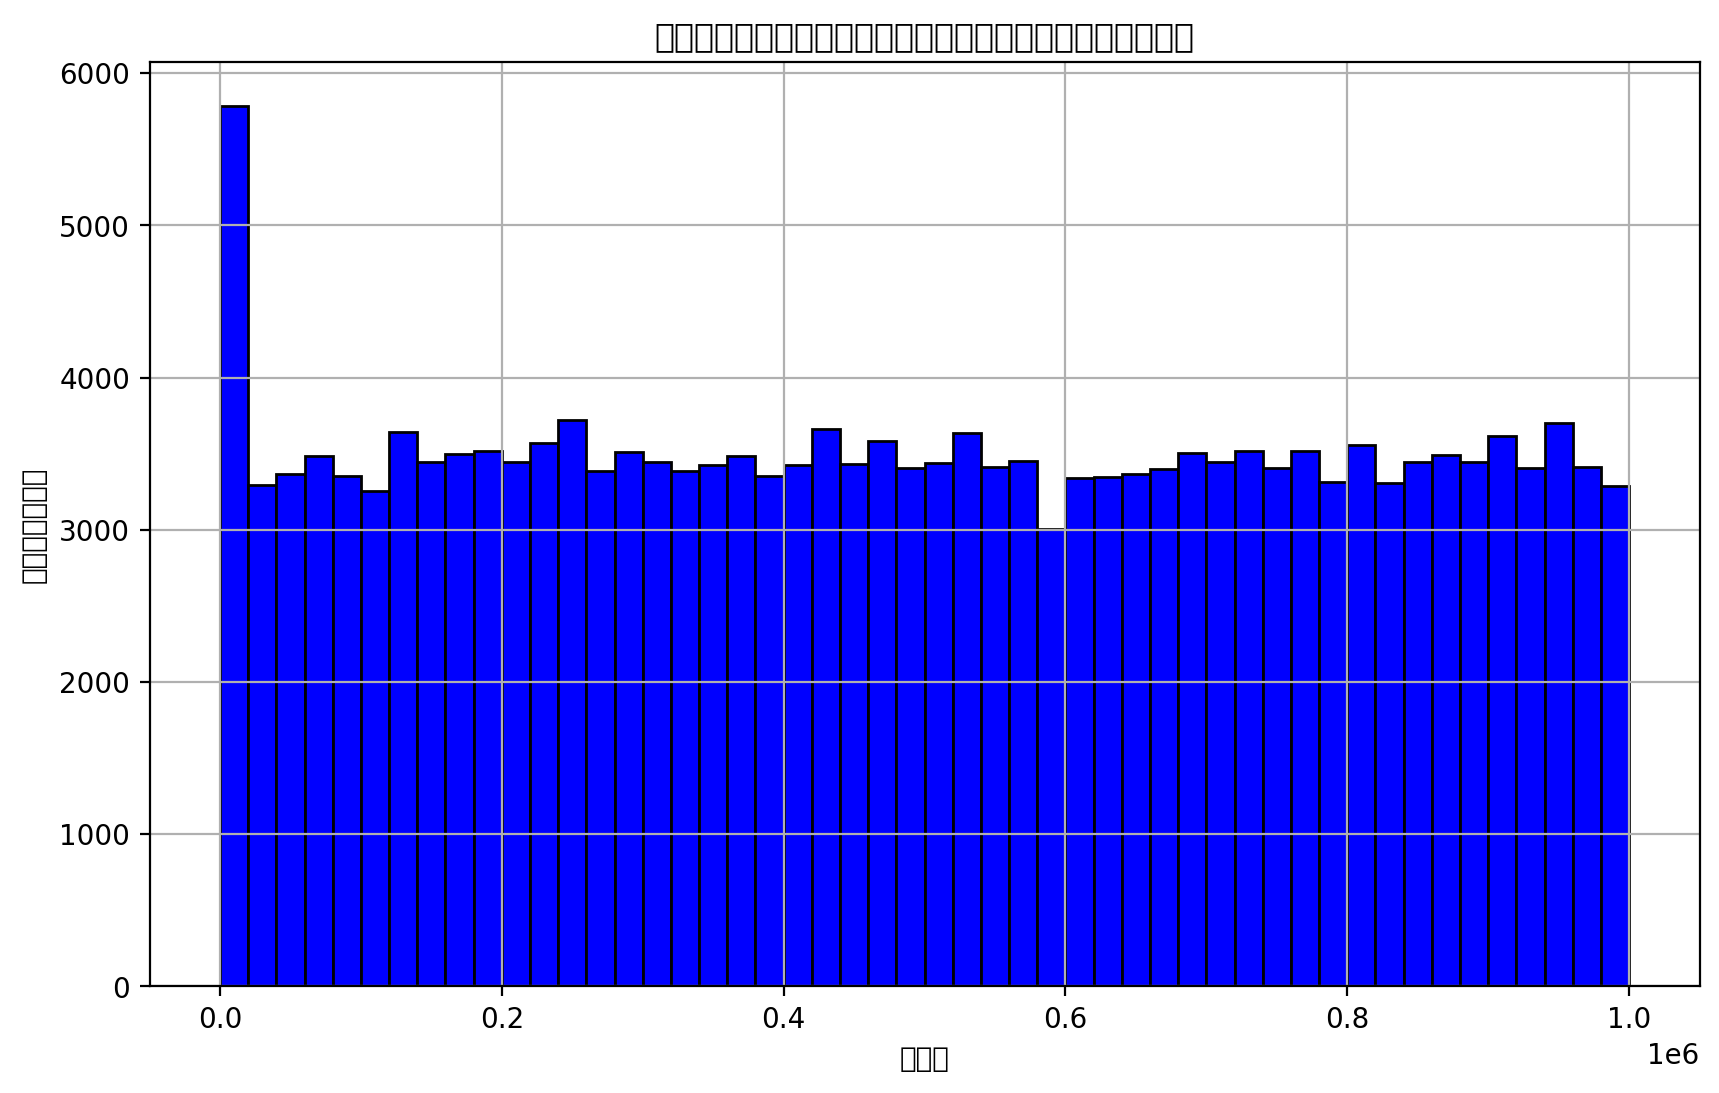

d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

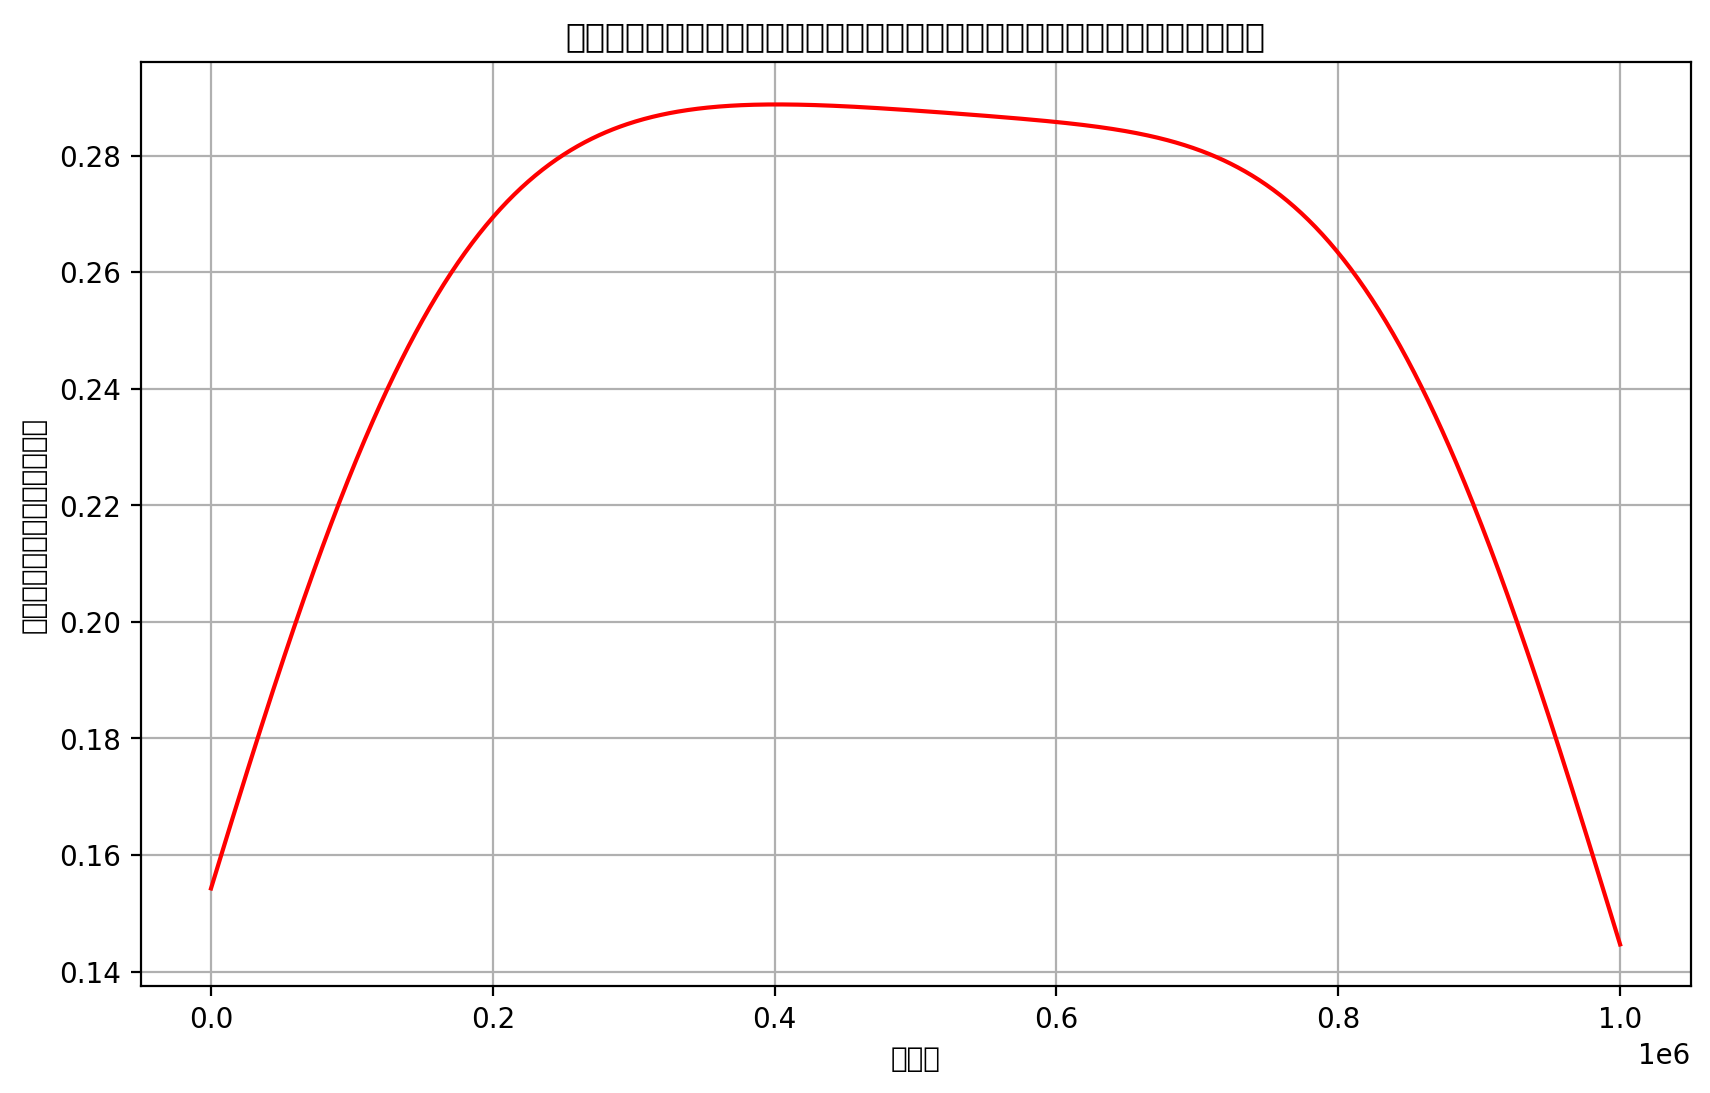

In [35]:


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

# 1. ความถี่ของเลข: สร้างฮิสโตแกรม (Histogram) เพื่อแสดงความถี่การออกของเลขแต่ละตัว
plt.figure(figsize=(10, 6))
plt.hist(numbers_series, bins=50, color='blue', edgecolor='black')
plt.title('ความถี่การออกของเลขแต่ละตัว')
plt.xlabel('เลข')
plt.ylabel('ความถี่')
plt.grid(True)
plt.show()

# 2. ความน่าจะเป็น: คำนวณโอกาสการออกของเลขในงวดถัดไปด้วยโมเดลทางสถิติ เช่น การกระจายตัวปกติ (Normal Distribution) โดย sklearn

# Standardize the data
scaler = StandardScaler()
numbers_scaled = scaler.fit_transform(numbers_series.values.reshape(-1, 1))

# Fit a Kernel Density Estimation model
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(numbers_scaled)

# Generate a range of values to estimate the probability density
x_d = np.linspace(min(numbers_series), max(numbers_series), 1000)
x_d_scaled = scaler.transform(x_d.reshape(-1, 1))

# Estimate the probability density
log_density = kde.score_samples(x_d_scaled)
density = np.exp(log_density)

# Plot the estimated probability density
plt.figure(figsize=(10, 6))
plt.plot(x_d, density, color='red')
plt.title('ความน่าจะเป็นการออกของเลขในงวดถัดไป')
plt.xlabel('เลข')
plt.ylabel('ความน่าจะเป็น')
plt.grid(True)
plt.show()

100 ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Index(['79', '85', '05', '92', '14', '98', '09', '46', '50', '62', '81', '11',
       '02', '15', '58', '25', '69', '26', '95', '06', '38', '65', '83', '53',
       '57', '28', '42', '35', '67', '07', '56', '64', '33', '29', '61', '52',
       '86', '44', '51', '32', '20', '89', '90', '59', '63', '45', '93', '73',
       '96', '36', '88', '82', '78', '23', '70', '60', '08', '94', '71', '97',


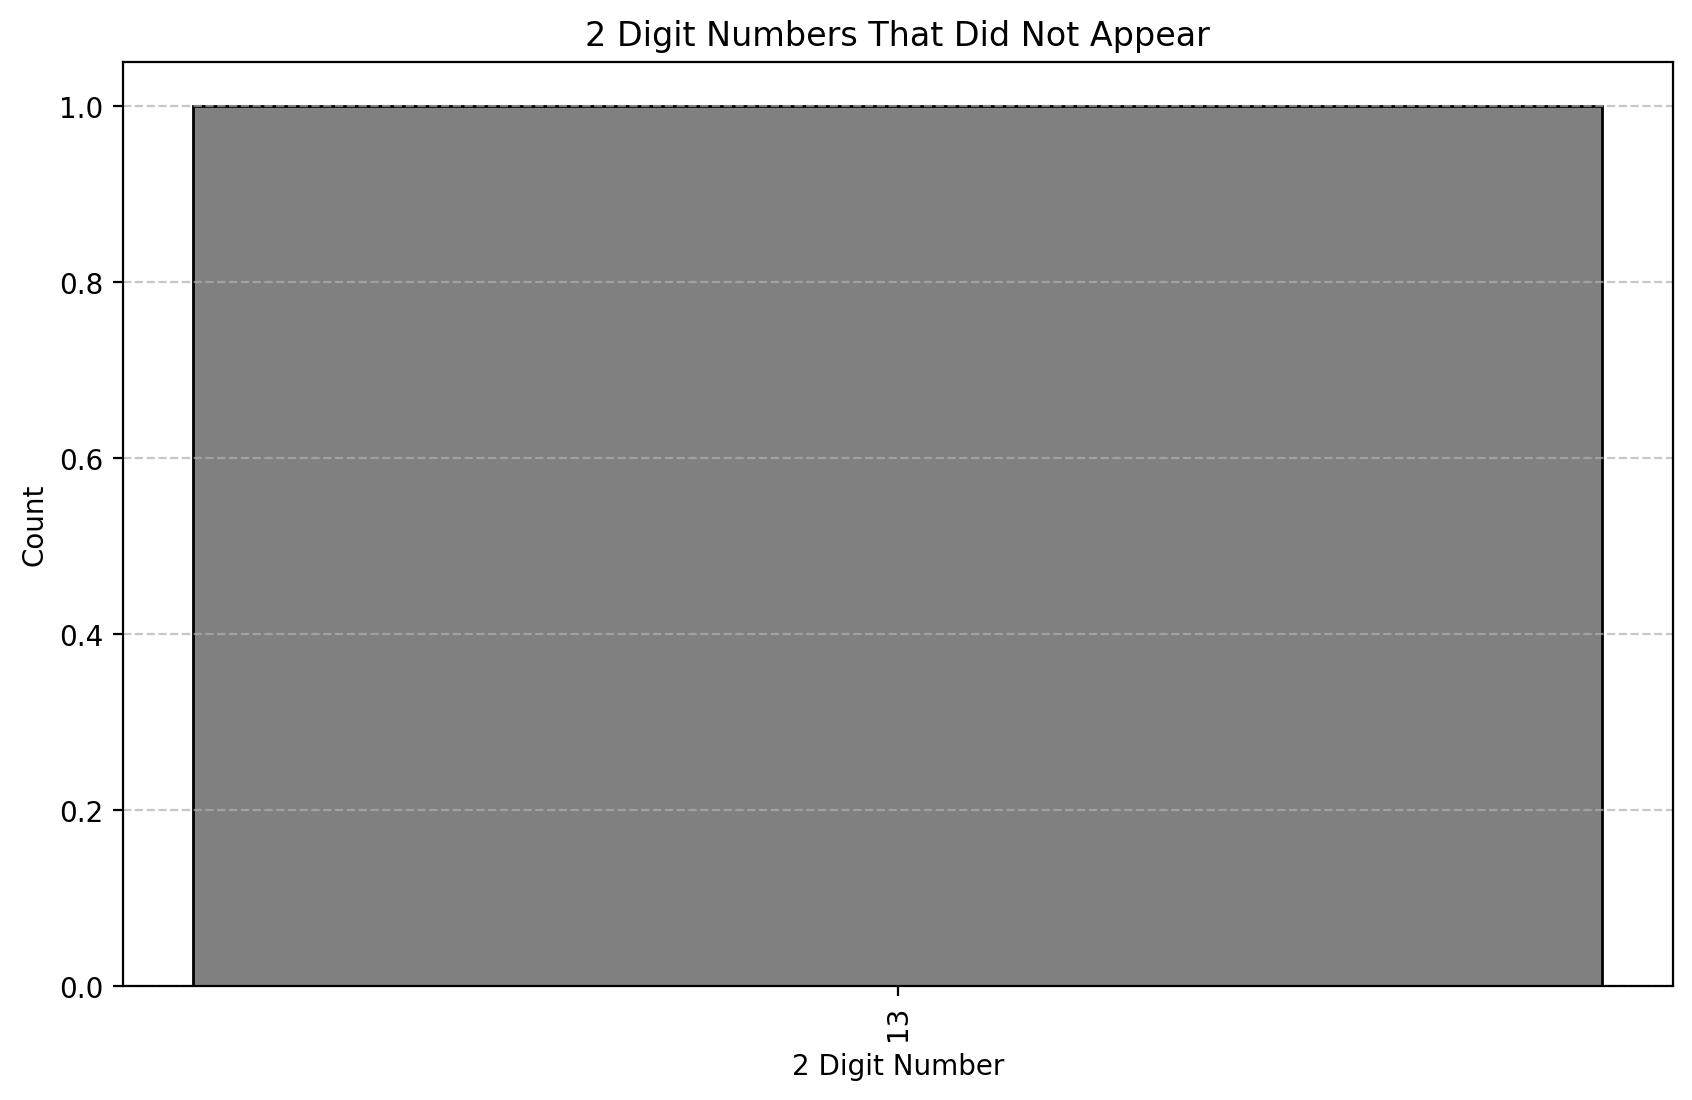

In [23]:
# Create a list of all possible 2-digit numbers as strings
all_2digit_numbers = [f'{i:02d}' for i in range(100)]
print(len(all_2digit_numbers), all_2digit_numbers)
# Find the 2-digit numbers that did not appear in the dataset
missing_2digit_numbers = set(all_2digit_numbers) - set(prize_2digits_counts.index)

print(prize_2digits_counts.index)
print(len(missing_2digit_numbers), missing_2digit_numbers)
# Plot the missing 2-digit numbers
plt.figure(figsize=(10, 6))
plt.bar(list(missing_2digit_numbers), [1] * len(missing_2digit_numbers), color='gray', edgecolor='black')
plt.title('2 Digit Numbers That Did Not Appear')
plt.xlabel('2 Digit Number')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()